In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fredapi as fd
import plotly.express as px


In [32]:
fred = fd.Fred(api_key = '')

In [33]:
data = fred.search("Consumer Price Index for All Urban Consumers: All Items in U.S. City Average")
data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-04-01,2023-04-01,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-03-14 07:39:01-05:00,94,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2023-04-01,2023-04-01,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2023-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-03-14 07:39:01-05:00,72,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2023-04-01,2023-04-01,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2022-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-01-12 07:38:17-06:00,46,None
CPILFESL,CPILFESL,2023-04-01,2023-04-01,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2023-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-03-14 07:38:02-05:00,81,"The ""Consumer Price Index for All Urban Consum..."
APU0000708111,APU0000708111,2023-04-01,2023-04-01,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2023-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-03-14 07:34:01-05:00,81,"Large white, Grade A chicken eggs, sold in a c..."
CPILFENS,CPILFENS,2023-04-01,2023-04-01,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2023-02-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-03-14 07:38:07-05:00,52,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2023-04-01,2023-04-01,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2022-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-01-12 07:38:32-06:00,12,None
APU0000FF1101,APU0000FF1101,2023-04-01,2023-04-01,"Average Price: Chicken Breast, Boneless (Cost ...",2006-01-01,2023-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-03-14 07:34:02-05:00,66,"All whole or half boneless, skinless chicken b..."
APU0000703112,APU0000703112,2023-04-01,2023-04-01,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2023-02-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-03-14 07:34:02-05:00,66,Fresh regular 100% ground beef excluding round...


In [34]:
data['title'][0]

'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average'

In [35]:
cpi=fred.get_series('CPIAUCSL')
cpi.name='values'
cpi

1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2022-10-01    297.987
2022-11-01    298.598
2022-12-01    298.990
2023-01-01    300.536
2023-02-01    301.648
Name: values, Length: 914, dtype: float64

In [36]:
df=pd.DataFrame(cpi).reset_index()
df

,index,values
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990
912,2023-01-01,300.536


In [37]:
df2 = df[df['index']> '1999-12-01']
df2

,index,values
636,2000-01-01,169.300
637,2000-02-01,170.000
638,2000-03-01,171.000
639,2000-04-01,170.900
640,2000-05-01,171.200
...,...,...
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990
912,2023-01-01,300.536


In [38]:
fig = px.line(df2, x='index', y='values', title='CPI Avg. 1990-2023')


In [39]:
fig.show()

In [40]:
df2=df2.rename(columns={'index': 'ds', 'values': 'y'})
df2

,ds,y
636,2000-01-01,169.300
637,2000-02-01,170.000
638,2000-03-01,171.000
639,2000-04-01,170.900
640,2000-05-01,171.200
...,...,...
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990
912,2023-01-01,300.536


In [41]:
from prophet import Prophet

ml=Prophet()
ml.fit(df2)

17:36:19 - cmdstanpy - INFO - Chain [1] start processing
17:36:19 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future=ml.make_future_dataframe(periods=10, freq='MS')
future.tail()


,ds
283,2023-08-01
284,2023-09-01
285,2023-10-01
286,2023-11-01
287,2023-12-01


In [43]:
result=ml.predict(future)
result[{'ds', 'yhat', 'yhat_lower', 'yhat_upper'}]

C:\Users\syyad\AppData\Local\Temp\ipykernel_1636\1808460812.py:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



,yhat,yhat_lower,yhat_upper,ds
0,170.372706,166.349429,174.108135,2000-01-01
1,170.488772,166.633865,174.396679,2000-02-01
2,170.994898,167.165613,174.659745,2000-03-01
3,171.061580,167.283052,174.967637,2000-04-01
4,171.415707,167.465019,175.269097,2000-05-01
...,...,...,...,...
283,297.882979,293.944109,301.791850,2023-08-01
284,298.655080,294.702538,302.665555,2023-09-01
285,299.482553,295.562957,303.251377,2023-10-01
286,300.480246,296.277651,304.037554,2023-11-01


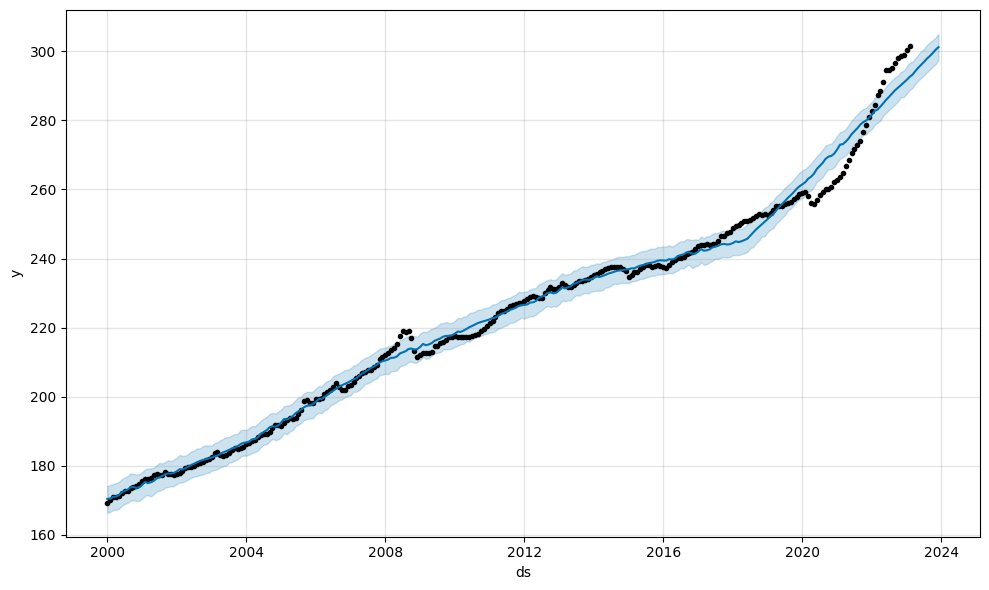

In [44]:
fig=ml.plot(result)

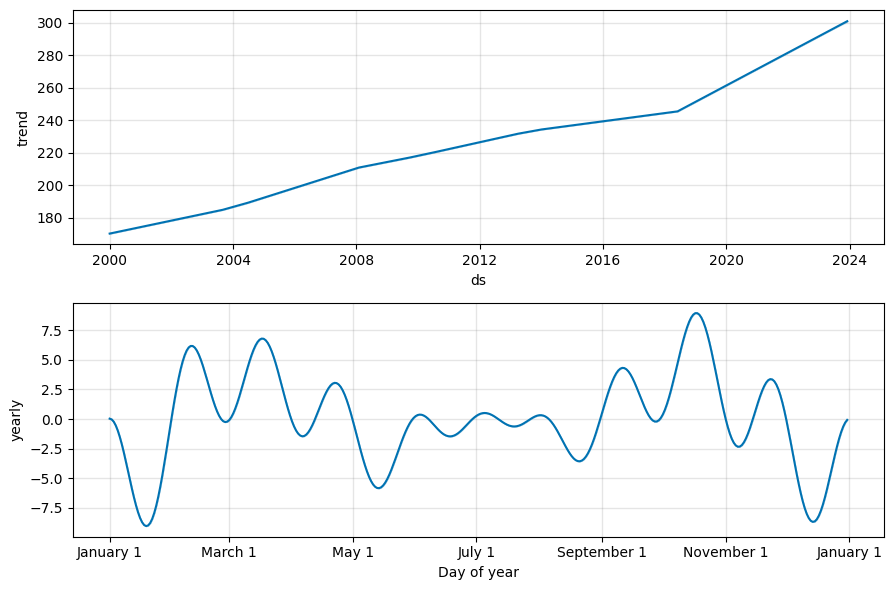

In [45]:
fig2=ml.plot_components(result)